In [2]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
from tqdm import tqdm
from modeler.modeler import Modeler as m
from processor.processor import Processor as p
from database.market import Market
from database.adatabase import ADatabase
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
start_date = datetime(2016,1,1)
end_date = datetime(2021,1,1)

In [4]:
market = Market()
competition_db = ADatabase("strategy_competition")

In [5]:
market.connect()
prices = market.retrieve("alpha_prices")
sp5 = market.retrieve("sp500")
correlations = market.retrieve("stock_crypto_corr")
market.disconnect()

In [6]:
prices = p.column_date_processing(prices)

In [7]:
prices["year"] = [x.year for x in prices["date"]]
prices["week"] = [x.week for x in prices["date"]]
prices["quarter"] = [x.quarter for x in prices["date"]]

In [8]:
prices["close"] = [float(x) for x in prices["close"]]

In [8]:
data = prices.groupby(["year","week","ticker"]).mean()
data = prices.pivot_table(index=["year","week"],columns="ticker",values="close").reset_index()

In [9]:
data = data[data["year"]>2010]
data.head()

ticker,year,week,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
583,2011,1,41.574,11.0020,62.442,332.9420,NaN,34.502,9.9140,48.1800,...,23.590,29.7420,74.984,34.8780,NaN,48.8860,53.7360,37.7840,NaN,NaN
584,2011,2,42.904,11.0000,62.656,344.5350,NaN,35.094,10.1740,47.5240,...,23.500,30.8575,76.390,35.8505,NaN,48.9500,54.9600,38.4460,NaN,NaN
585,2011,3,42.795,10.0575,63.260,334.7225,NaN,35.885,9.7325,47.6025,...,23.840,31.3325,78.420,36.1200,NaN,48.8625,56.0725,38.3825,NaN,NaN
586,2011,4,42.292,10.4480,63.990,340.4020,NaN,36.290,9.9260,46.9500,...,23.932,32.1940,79.160,36.0200,NaN,47.6120,56.9500,38.8020,NaN,NaN
587,2011,5,41.818,9.6360,63.072,343.7220,NaN,35.924,11.0660,45.6480,...,23.700,32.9880,82.944,36.1025,NaN,48.0880,60.2080,39.8260,NaN,NaN


In [10]:
data.fillna(-99999,inplace=True)
for col in data.columns:
    if -99999 == data[col].min():
        data.drop(col,inplace=True,axis=1)

In [11]:
data

ticker,year,week,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,...,WMB,WMT,WRB,WST,WY,WYNN,XEL,XOM,XRAY,YUM
583,2011,1,41.574000,11.002000,62.442000,332.942000,34.502,9.914000,48.180000,48.4280,...,24.658000,54.3560,27.306000,41.198000,20.012,113.724000,23.590000,74.984000,34.878000,48.886000
584,2011,2,42.904000,11.000000,62.656000,344.535000,35.094,10.174000,47.524000,49.3280,...,25.798000,54.4940,27.016000,40.700000,21.290,117.622000,23.500000,76.390000,35.850500,48.950000
585,2011,3,42.795000,10.057500,63.260000,334.722500,35.885,9.732500,47.602500,50.6825,...,26.200000,55.4725,27.685000,39.707500,21.780,117.307500,23.840000,78.420000,36.120000,48.862500
586,2011,4,42.292000,10.448000,63.990000,340.402000,36.290,9.926000,46.950000,51.8840,...,26.666000,56.9800,28.450000,40.138000,22.858,116.448000,23.932000,79.160000,36.020000,47.612000
587,2011,5,41.818000,9.636000,63.072000,343.722000,35.924,11.066000,45.648000,52.3460,...,27.312000,56.0420,28.708000,40.496000,23.704,118.368000,23.700000,82.944000,36.102500,48.088000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2022,9,133.302000,16.042000,205.922000,164.856000,144.054,312.996000,120.306000,315.7620,...,32.382000,137.8840,89.896000,386.354000,39.092,84.670000,68.358000,80.650000,53.370000,120.606000
1166,2022,10,131.512000,13.774000,203.154000,158.588000,145.162,297.636000,116.876000,307.4320,...,32.630000,140.9140,91.404000,367.722000,39.140,73.986000,70.422000,85.594000,50.540000,115.328000
1167,2022,11,133.760000,15.918000,205.096000,157.980000,150.448,294.740000,119.226000,318.4540,...,31.272000,145.1260,94.792000,394.428000,39.402,73.626000,69.496000,78.736000,48.288000,117.728000
1168,2022,12,136.746000,16.518000,211.748000,170.640000,152.824,314.292000,119.468000,325.0940,...,32.828000,143.2520,85.214000,408.590000,38.442,79.702000,69.682000,83.150000,49.460000,118.498000


In [12]:
correlations

,index,security,value,same
0,A,A,1.000000,True
1,AAL,A,-0.121550,False
2,AAP,A,0.741648,False
3,AAPL,A,0.688113,False
4,ABBV,A,0.495537,False
...,...,...,...,...
270395,LUNA,XTZ,0.473125,False
270396,MATIC,XTZ,0.270303,False
270397,SHIB,XTZ,0.488776,False
270398,XRP,XTZ,0.712733,False


In [13]:
correlations["abs"] = [abs(x) for x in correlations["value"]]

In [14]:
correlations

,index,security,value,same,abs
0,A,A,1.000000,True,1.000000
1,AAL,A,-0.121550,False,0.121550
2,AAP,A,0.741648,False,0.741648
3,AAPL,A,0.688113,False,0.688113
4,ABBV,A,0.495537,False,0.495537
...,...,...,...,...,...
270395,LUNA,XTZ,0.473125,False,0.473125
270396,MATIC,XTZ,0.270303,False,0.270303
270397,SHIB,XTZ,0.488776,False,0.488776
270398,XRP,XTZ,0.712733,False,0.712733


In [59]:
start_year = 2016
end_year = 2022
sim = []
competition_db.connect()
for year in tqdm(range(start_year,end_year)):
    for ticker in sp5["Symbol"]:
        try:
            if ticker in data.columns:
                ticker_data = data.copy()
                factors = correlations[(correlations["index"]==ticker) & (correlations["abs"]>0.8)]["security"].unique()
                factors = [x for x in factors if x in data.columns]
                training_data = ticker_data[(ticker_data["year"]<year) & (ticker_data["year"]>=year-5)].reset_index(drop=True)
                training_data["y"] = training_data[ticker].shift(-1)
                training_data.dropna(inplace=True)
                prediction_data = ticker_data[ticker_data["year"]==year]
                if training_data.index.size > 100 and len(factors) > 1:
                    refined_data = {"X":training_data[factors],"y":training_data[["y"]]}
                    models = m.regression(refined_data)
                    for row in models.iterrows():
                        model = row[1]["model"]
                        api = row[1]["api"]
                        score = row[1]["score"]
                        prediction_data[f"{api}_prediction"] = model.predict(prediction_data[factors])
                        prediction_data[f"{api}_score"] = score
                    prediction_data["ticker"] = ticker
                    included_columns = ["year","week","ticker"]
                    included_columns.extend([x for x in prediction_data.columns if "score" in x or "prediction" in x])
                    sim.append(prediction_data[included_columns])
                    competition_db.store("sim",prediction_data[included_columns])
                else:
                    continue
            else:
                continue
        except Exception as e:
            print(year,ticker,str(e))
competition_db.disconnect()

  0%|                                                                                                                                                                                                                                             | 0/6 [00:00<?, ?it/s]

at least one array or dtype is required
[18:59:37] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:602: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Input data must have at least one feature
2016 AMP 'str' object has no attribute 'predict'


 17%|█████████████████████████████████████                                                                                                                                                                                         | 1/6 [2:10:25<10:52:09, 7825.86s/it]

at least one array or dtype is required
[21:10:17] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:602: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Input data must have at least one feature
2017 AMP 'str' object has no attribute 'predict'


 33%|██████████████████████████████████████████████████████████████████████████▎                                                                                                                                                    | 2/6 [4:22:03<8:44:32, 7868.20s/it]

at least one array or dtype is required
[23:21:35] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:602: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Input data must have at least one feature
2018 AMP 'str' object has no attribute 'predict'


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                               | 3/6 [6:31:08<6:30:36, 7812.01s/it]

at least one array or dtype is required
[01:30:43] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:602: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Input data must have at least one feature
2019 AMP 'str' object has no attribute 'predict'


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 4/6 [8:40:24<4:19:39, 7789.72s/it]

at least one array or dtype is required
[03:39:51] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:602: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Input data must have at least one feature
2020 AMP 'str' object has no attribute 'predict'


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 5/6 [10:50:26<2:09:54, 7794.29s/it]

at least one array or dtype is required
[05:49:39] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:602: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Input data must have at least one feature
2021 AMP 'str' object has no attribute 'predict'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [12:57:19<00:00, 7773.25s/it]


### Yearly Modeling Code

In [124]:
start_year = 2022
end_year = 2023
sim = []
competition_db.connect()
for year in tqdm(range(start_year,end_year)):
    for ticker in sp5["Symbol"][1:]:
        try:
            if ticker in data.columns:
                ticker_data = data.copy()
                factors = correlations[(correlations["index"]==ticker) & (correlations["abs"]>0.8)]["security"].unique()
                factors = [x for x in factors if x in data.columns]
                training_data = ticker_data[(ticker_data["year"]<year) & (ticker_data["year"]>=year-5)].reset_index(drop=True)
                training_data["y"] = training_data[ticker].shift(-1)
                training_data.dropna(inplace=True)
                prediction_data = ticker_data[ticker_data["year"]==year]
                if training_data.index.size > 100 and len(factors) > 1:
                    refined_data = {"X":training_data[factors],"y":training_data[["y"]]}
                    models = m.regression(refined_data)
                    models["model"] = [pickle.dumps(x) for x in models["model"]]
                    models["factors"] = [factors for i in range(models.index.size)]
                    models["ticker"] = ticker
                    models["year"] = year
                    competition_db.store("models",models)
                else:
                    continue
            else:
                continue
        except Exception as e:
            print(year,ticker,str(e))
competition_db.disconnect()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [2:06:52<00:00, 7612.31s/it]


In [128]:
start_year = 2022
end_year = 2023
sim = []
competition_db.connect()
models = competition_db.retrieve("models")
models["model"] = [pickle.loads(x) for x in models["model"]]
for year in tqdm(range(start_year,end_year)):
    for ticker in sp5["Symbol"]:
        try:
            if ticker in data.columns:
                ticker_data = data.copy()
                ticker_model_data = models[(models["ticker"]==ticker) & (models["year"]==year)]
                factors = ticker_model_data["factors"].iloc[0]
                prediction_data = ticker_data[ticker_data["year"]==year]
                if training_data.index.size > 100 and len(factors) > 1:
                    refined_data = {"X":training_data[factors],"y":training_data[["y"]]}
                    for row in ticker_model_data.iterrows():
                        model = row[1]["model"]
                        api = row[1]["api"]
                        score = row[1]["score"]
                        prediction_data[f"{api}_prediction"] = model.predict(prediction_data[factors])
                        prediction_data[f"{api}_score"] = score
                    prediction_data["ticker"] = ticker
                    included_columns = ["year","week","ticker"]
                    included_columns.extend([x for x in prediction_data.columns if "score" in x or "prediction" in x])
                    competition_db.store("predictions",prediction_data[included_columns].tail(1))
                else:
                    continue
            else:
                continue
        except Exception as e:
            print(year,ticker,str(e))
competition_db.disconnect()

  0%|                                                                                                                                                                                                                                             | 0/1 [00:00<?, ?it/s]

2022 AMP single positional indexer is out-of-bounds
2022 BAX single positional indexer is out-of-bounds
2022 BDX single positional indexer is out-of-bounds
2022 BBY single positional indexer is out-of-bounds
2022 BIIB single positional indexer is out-of-bounds
2022 BKNG single positional indexer is out-of-bounds
2022 CHRW single positional indexer is out-of-bounds
2022 CTSH single positional indexer is out-of-bounds
2022 CL single positional indexer is out-of-bounds
2022 STZ single positional indexer is out-of-bounds
2022 DVA single positional indexer is out-of-bounds
2022 EA single positional indexer is out-of-bounds
2022 ES single positional indexer is out-of-bounds
2022 FMC single positional indexer is out-of-bounds
2022 GM single positional indexer is out-of-bounds
2022 HAS single positional indexer is out-of-bounds
2022 ILMN single positional indexer is out-of-bounds
2022 KMB single positional indexer is out-of-bounds
2022 LDOS single positional indexer is out-of-bounds
2022 MA si

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.62s/it]


In [127]:
prediction_data[included_columns].tail(1)

ticker,year,week,ticker,skl_prediction,skl_score,xgb_prediction,xgb_score,cat_prediction,cat_score
1169,2022,13,MMM,151.845494,0.941907,145.098923,0.945254,169.159524,0.951578


In [9]:
# simulation = pd.concat(sim).groupby(["year","week","ticker"]).mean().reset_index()
competition_db.connect()
simulation = competition_db.retrieve("sim").groupby(["year","week","ticker"]).mean().reset_index()
competition_db.disconnect()
simulation = prices.merge(simulation,on=["year","week","ticker"]).dropna()

In [10]:
simulation["average_prediction"] = [sum([row[1][col] for col in simulation.columns if "prediction" in col]) for row in simulation.iterrows()]

In [11]:
simulation["average_prediction"] = simulation["average_prediction"] / 3
simulation["delta"] = (simulation["average_prediction"] - simulation["close"]) / simulation["close"]

In [12]:
positions = 5
start_date = simulation["date"].min()
end_date = simulation["date"].max()
reqs = [1,3,5]
limit = 7
values = [True]
trades = []
for value in tqdm(values):
    for req in tqdm(reqs):
        for position in range(positions):
            date = start_date
            iterration_sim = simulation.copy()
            if not value:
                iterration_sim["delta"] = iterration_sim["delta"] * -1
            while date < end_date:
                try:
                    todays_recs = iterration_sim[iterration_sim["date"]==date]
                    todays_recs.sort_values("delta",ascending=False,inplace=True)
                    if todays_recs.index.size > 0:
                        offering = todays_recs.iloc[position]
                        if offering["delta"] > req:
                            trade = offering
                            ticker = trade["ticker"]
                            buy_price = trade["close"]
                            exits = iterration_sim[(iterration_sim["ticker"]==ticker) & (iterration_sim["date"]>date)].iloc[:limit]
                            exits["gains"] = (exits["close"] - buy_price) / buy_price
                            exit = exits.sort_values("gains",ascending=False).iloc[0]
                            trade["sell_price"] = exit["close"]
                            trade["sell_date"] = exit["date"]
                            date = exit["date"] + timedelta(days=1)
                            trade["value"] = value
                            trade["req"] = req
                            trade["position"] = position
                            trades.append(trade)
                        else:
                            date = date + timedelta(days=1)
                    else:
                        date = date + timedelta(days=1)
                except Exception as e:
                    print(str(e))
                    date = date+timedelta(days=1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [02:10<00:00, 130.03s/it]


In [13]:
t = pd.DataFrame(trades)

In [14]:
t["delta"] =  (t["sell_price"] - t["close"]) / t["close"]

In [15]:
analysis = []
for value in tqdm(values):
    for req in tqdm(reqs):
        for position in range(positions):
            position_trades = t[(t["value"]==value) & (t["req"]==req) & (t["position"]==position)].sort_values("date")
            position_trades["delta"] = (position_trades["sell_price"] - position_trades["close"]) / position_trades["close"]
            initial = 100 / positions
            for delta in position_trades["delta"]:
                initial = initial * (1+delta)
            analysis.append({
                "value":value,
                "req":req,
                "position":position,
                "pv":initial
            })

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.62it/s]


In [16]:
complete = pd.DataFrame(analysis).pivot_table(index=["value","req"],columns="position",values="pv").reset_index()

In [18]:
complete["pv"] = [sum([row[1][i] for i in range(5)]) for row in complete.iterrows()]

In [19]:
complete.sort_values("pv",ascending=False)

position,value,req,0,1,2,3,4,pv
0,True,1,4315.825459,4731.850704,1013.880986,1417.603057,386.958927,11866.119133
1,True,3,242.797485,57.775344,102.237936,21.217741,20.721745,444.750250
2,True,5,50.326310,21.933647,21.859590,21.217741,20.721745,136.059033


In [20]:
best_iteration = t[(t["value"]==True) & (t["req"]==1)].copy()

In [21]:
pivoted = best_iteration.pivot_table(index="date",columns="position",values="delta").fillna(0)

In [22]:
pivoted

position,0,1,2,3,4
date,,,,,
2016-01-12,0.148741,0.000000,0.000000,0.000000,0.000000
2016-01-13,0.000000,0.196948,0.000000,0.000000,0.000000
2016-01-19,0.000000,0.000000,0.002645,0.000000,0.000000
2016-01-20,0.000000,0.000000,0.000000,0.252495,0.000000
2016-01-25,0.230964,0.060490,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-03,0.072537,0.072537,0.072537,0.072537,0.072537
2021-12-13,-0.008697,-0.008697,-0.008697,-0.008697,-0.008697
2021-12-20,0.095842,0.095842,0.095842,0.095842,0.095842


In [25]:
for i in range(5):
    pv = []
    initial = 20
    for delta in pivoted[i]:
        initial = initial * (1+delta)
        pv.append(initial)
    pivoted[f"pv_{i}"] = pv

In [27]:
pivoted["pv"] = [sum([row[1][f"pv_{i}"] for i in range(5)]) for row in pivoted.iterrows()]

In [28]:
pivoted.reset_index(inplace=True)

In [29]:
pivoted

position,date,0,1,2,3,4,pv_0,pv_1,pv_2,pv_3,pv_4,pv
0,2016-01-12,0.148741,0.000000,0.000000,0.000000,0.000000,22.974828,20.000000,20.000000,20.000000,20.000000,102.974828
1,2016-01-13,0.000000,0.196948,0.000000,0.000000,0.000000,22.974828,23.938960,20.000000,20.000000,20.000000,106.913789
2,2016-01-19,0.000000,0.000000,0.002645,0.000000,0.000000,22.974828,23.938960,20.052893,20.000000,20.000000,106.966681
3,2016-01-20,0.000000,0.000000,0.000000,0.252495,0.000000,22.974828,23.938960,20.052893,25.049900,20.000000,112.016582
4,2016-01-25,0.230964,0.060490,0.000000,0.000000,0.000000,28.281197,25.387016,20.052893,25.049900,20.000000,118.771007
...,...,...,...,...,...,...,...,...,...,...,...,...
372,2021-12-03,0.072537,0.072537,0.072537,0.072537,0.072537,4009.557887,4396.060380,941.932092,1317.004493,359.498833,11024.053685
373,2021-12-13,-0.008697,-0.008697,-0.008697,-0.008697,-0.008697,3974.688068,4357.829276,933.740416,1305.550934,356.372389,10928.181083
374,2021-12-20,0.095842,0.095842,0.095842,0.095842,0.095842,4355.629086,4775.491213,1023.231721,1430.677206,390.527739,11975.556964
375,2021-12-27,0.001893,0.001893,0.001893,0.001893,0.001893,4363.872500,4784.529253,1025.168278,1433.384889,391.266847,11998.221768


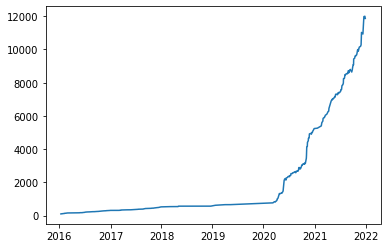

In [30]:
plt.plot(pivoted["date"],pivoted["pv"])

In [ ]:
competition_db.connect()
competition_db.store("trades",t)
competition_db.disconnect()